# Numpy and Pandas Demo

This notebook provides a very basic introduction to the Numpy and Pandas Python packages. This notebook must be run with a Jupyter kernel that has Numpy, Pandas, and Matplotlib installed. You can execute the single cell in the following notebook to install suck a kernel:

# Numpy

Numpy is a popular Python library that is useful for rapid processing of numerical data.

In [1]:
import numpy as np  # np is now shorthand for "numpy" throughout this notebook

In [2]:
x = [] # this is a traditional Python list
for xi in range(10000):
    x.append(xi)

In [3]:
y = np.asarray(x) # now we are converting this list to a numpy array

One of the primary advantages of Numpy is its speed. Let's compare the processing time of a Numpy array versus a traditional Python list.

In [4]:
%%time
xnew = [xi*8 for xi in x] # here we use a list comprehension to scale each element of x by 8

CPU times: user 901 µs, sys: 0 ns, total: 901 µs
Wall time: 906 µs


In [5]:
%%time
ynew = y*8  # this scales each element of our numpy array by 8

CPU times: user 160 µs, sys: 32 µs, total: 192 µs
Wall time: 110 µs


This is a somewhat simple example, the performance differences are often even more dramatic. The reason for these differences is that Numpy was designed from the ground up with performance in mind. The module is actually loaded as a pre-compiled and highly optimized C code. Numpy arrays are also layed out in memory in a more intelligent fashion compared to traditional Python lists.

## Creating Numpy Arrays

Note, much of this tutorial is taken from: http://cs231n.github.io/python-numpy-tutorial/

In [6]:
a = np.array([1, 2, 3]) # rank 1 array
print(a)
print(a.shape)

[1 2 3]
(3,)


In [7]:
b = np.array([[1,2,3],[4,5,6]]) # rank 2 array
print(b)
print(b.shape)

[[1 2 3]
 [4 5 6]]
(2, 3)


In [8]:
c = np.zeros((2,2))
print(c)

[[0. 0.]
 [0. 0.]]


In [9]:
d = np.ones((1,2))
print(d)

[[1. 1.]]


In [10]:
e = np.full((2,2), 7)
print(e)

[[7 7]
 [7 7]]


In [11]:
f = np.random.random((2,2))
print(f)

[[0.2103888  0.6619569 ]
 [0.27561531 0.60409241]]


## Slicing and Dicing Data with Numpy

In [12]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

In [13]:
print(a[0,0]) # Numpy is zero-indexed, just like normal Python lists!

1


In [14]:
print(a[2,3])

12


In [15]:
b = a[:2, 1:3]  # The first index is requesting the first two rows of array a
print(b)

[[2 3]
 [6 7]]


In [16]:
print(a[0, 1])

2


In [17]:
b[0, 0] = 77
print(a[0, 1]) # b is effectively a alias for a subset of array a!

77


How would you slice array a to yield the following?
* third column ([3 7 11]) of data?
* [[7 8] [11 12]]

In [18]:
print(a[a>8])  # boolean-based indexing is also possible in Numpy

[77  9 10 11 12]


## Mathematical Operations on Numpy Arrays

In [19]:
print(np.sin(a))

[[ 0.84147098  0.99952016  0.14112001 -0.7568025 ]
 [-0.95892427 -0.2794155   0.6569866   0.98935825]
 [ 0.41211849 -0.54402111 -0.99999021 -0.53657292]]


In general, you want to avoid doing mathematical operations within a for loop within Python (true in Matlab and R, as well). Instead, rely on the "vectorized" math functions available through Numpy.

In [20]:
print(y.size)

10000


In [21]:
%%time
for yi in y:
    np.sin(yi)

CPU times: user 20.7 ms, sys: 0 ns, total: 20.7 ms
Wall time: 20.2 ms


In [22]:
%%time
np.sin(y)  # notice we are now passing the entire array to this function

CPU times: user 805 µs, sys: 158 µs, total: 963 µs
Wall time: 524 µs


array([0.        , 0.84147098, 0.90929743, ..., 0.43692413, 0.99297289,
       0.63608696])

# Pandas

Pandas is a Python package designed for working with tabular data. It provides a dataframe-based interface for storing, accessing, and processing data. Pandas makes use of Numpy and Matplotlib internally. A more complete demo of the types of operations that can be performed on a Pandas dataframe, see the following demo: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#min

First, let's download some fitbit data from GitHub that we can wrangle into submission.

In [23]:
%%bash
git clone https://github.com/willie8338/Fitbit.git # download some fitbit data
ls -l --color Fitbit

total 12
-rw-r--r-- 1 frenchwr accre 1297 Feb 26 20:11 canopy-comments.txt
drwxr-xr-x 2 frenchwr accre   91 Feb 26 20:11 data
drwxr-xr-x 2 frenchwr accre  120 Feb 26 20:11 fitbittools
-rw-r--r-- 1 frenchwr accre    0 Feb 26 20:11 __init__.py
-rw-r--r-- 1 frenchwr accre  169 Feb 26 20:11 __init__.pyc
drwxr-xr-x 2 frenchwr accre  138 Feb 26 20:11 notebooks
-rw-r--r-- 1 frenchwr accre  765 Feb 26 20:11 README.md


fatal: destination path 'Fitbit' already exists and is not an empty directory.


In [24]:
%%bash
ls -l --color Fitbit/data

total 20
-rw-r--r-- 1 frenchwr accre 4680 Feb 26 20:11 fitbit_export_20140704.csv
-rw-r--r-- 1 frenchwr accre 5397 Feb 26 20:11 fitbit_export_20140710.csv
-rw-r--r-- 1 frenchwr accre  232 Feb 26 20:11 README.md


In [25]:
import pandas as pd

In [26]:
# The CSV has two sections - Activity and Sleep. Let's just focus on the Activity data.
# Excel spreadsheets can also be loaded directly into a Pandas dataframe
df = pd.read_csv("Fitbit/data/fitbit_export_20140710.csv",skiprows=1,nrows=50,index_col=0)

In [27]:
df.head()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2014-05-22,"2,763","15,072",6.96,14,"1,120",95,77,74,"1,351"
2014-05-23,"2,324","8,306",3.81,9,778,122,63,23,867
2014-05-24,"2,640","13,103",6.01,50,584,165,77,48,"1,280"
2014-05-25,"2,329","7,992",3.66,16,707,187,61,11,932
2014-05-26,"2,774","12,727",5.84,19,436,264,111,26,"1,546"


In [28]:
df.tail()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2014-07-06,"2,160","3,974",1.82,8,683,169,37,3,705
2014-07-07,"2,488","10,549",4.84,21,724,137,84,30,"1,082"
2014-07-08,"2,315","9,710",4.45,16,"1,148",84,91,16,838
2014-07-09,"2,194","6,426",2.95,17,785,100,62,10,694
2014-07-10,"1,949","10,538",4.83,4,433,97,51,54,"1,053"


In [29]:
df.index

Index(['2014-05-22', '2014-05-23', '2014-05-24', '2014-05-25', '2014-05-26',
       '2014-05-27', '2014-05-28', '2014-05-29', '2014-05-30', '2014-05-31',
       '2014-06-01', '2014-06-02', '2014-06-03', '2014-06-04', '2014-06-05',
       '2014-06-06', '2014-06-07', '2014-06-08', '2014-06-09', '2014-06-10',
       '2014-06-11', '2014-06-12', '2014-06-13', '2014-06-14', '2014-06-15',
       '2014-06-16', '2014-06-17', '2014-06-18', '2014-06-19', '2014-06-20',
       '2014-06-21', '2014-06-22', '2014-06-23', '2014-06-24', '2014-06-25',
       '2014-06-26', '2014-06-27', '2014-06-28', '2014-06-29', '2014-06-30',
       '2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04', '2014-07-05',
       '2014-07-06', '2014-07-07', '2014-07-08', '2014-07-09', '2014-07-10'],
      dtype='object', name='Date')

In [30]:
# Let's convert our index to a datatime type, which is more fully featured
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2014-05-22', '2014-05-23', '2014-05-24', '2014-05-25',
               '2014-05-26', '2014-05-27', '2014-05-28', '2014-05-29',
               '2014-05-30', '2014-05-31', '2014-06-01', '2014-06-02',
               '2014-06-03', '2014-06-04', '2014-06-05', '2014-06-06',
               '2014-06-07', '2014-06-08', '2014-06-09', '2014-06-10',
               '2014-06-11', '2014-06-12', '2014-06-13', '2014-06-14',
               '2014-06-15', '2014-06-16', '2014-06-17', '2014-06-18',
               '2014-06-19', '2014-06-20', '2014-06-21', '2014-06-22',
               '2014-06-23', '2014-06-24', '2014-06-25', '2014-06-26',
               '2014-06-27', '2014-06-28', '2014-06-29', '2014-06-30',
               '2014-07-01', '2014-07-02', '2014-07-03', '2014-07-04',
               '2014-07-05', '2014-07-06', '2014-07-07', '2014-07-08',
               '2014-07-09', '2014-07-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [31]:
df.dtypes

Calories Burned            object
Steps                      object
Distance                  float64
Floors                      int64
Minutes Sedentary          object
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories          object
dtype: object

In [32]:
df.columns

Index(['Calories Burned', 'Steps', 'Distance', 'Floors', 'Minutes Sedentary',
       'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories'],
      dtype='object')

Notice that the CSV uses commas when values are > 999. This can cause issues, so let's remove those first and convert the type float.

In [33]:
for c in df.columns:
    if (df[c].dtype == object):
        df[c] = df[c].str.replace(',','')
        df[c] = df[c].astype(float)

In [34]:
df.head()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2014-05-22,2763.0,15072.0,6.96,14,1120.0,95,77,74,1351.0
2014-05-23,2324.0,8306.0,3.81,9,778.0,122,63,23,867.0
2014-05-24,2640.0,13103.0,6.01,50,584.0,165,77,48,1280.0
2014-05-25,2329.0,7992.0,3.66,16,707.0,187,61,11,932.0
2014-05-26,2774.0,12727.0,5.84,19,436.0,264,111,26,1546.0


Pandas dataframes provide a rich set of SQL-like functionality. Try typing "df." and then the tab key to see a drop down menu of the various operations that can be applied to your dataframe. The describe() method is great for generating a quick overview of your data:

In [35]:
df.describe()

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2459.500000,10199.420000,4.685000,13.620000,726.200000,129.280000,73.260000,33.080000,1046.860000
std,293.277903,4386.698573,2.017137,16.241657,128.768579,50.932544,27.431406,29.586842,341.939069
min,1949.000000,3390.000000,1.550000,0.000000,433.000000,65.000000,22.000000,0.000000,478.000000
25%,2251.500000,7149.000000,3.275000,7.250000,660.250000,89.500000,55.250000,10.250000,818.500000
50%,2373.500000,9132.500000,4.195000,10.000000,725.000000,112.000000,70.500000,23.500000,968.500000
75%,2628.000000,13010.000000,5.975000,16.000000,769.750000,166.500000,90.750000,49.500000,1251.000000
max,3084.000000,20417.000000,9.400000,111.000000,1148.000000,273.000000,177.000000,101.000000,1845.000000


In [36]:
df.sort_values(by='Steps',ascending=False)

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2014-06-27,3084.0,20417.0,9.40,5,650.0,86,105,101,1727.0
2014-07-01,3030.0,19928.0,9.16,17,1039.0,100,103,95,1679.0
2014-05-29,3056.0,19463.0,8.93,3,624.0,91,100,98,1695.0
2014-06-06,2954.0,18470.0,8.47,4,655.0,83,87,94,1564.0
2014-06-14,3026.0,17984.0,8.25,10,498.0,233,177,31,1845.0
2014-06-13,2970.0,16158.0,7.43,3,661.0,179,67,85,1659.0
2014-05-22,2763.0,15072.0,6.96,14,1120.0,95,77,74,1351.0
2014-06-24,2866.0,14866.0,6.83,16,650.0,134,87,73,1511.0
2014-06-10,2790.0,14267.0,6.54,10,651.0,123,78,68,1405.0


## Selecting Data

In [37]:
df['Minutes Very Active'].head(10)

Date
2014-05-22    74
2014-05-23    23
2014-05-24    48
2014-05-25    11
2014-05-26    26
2014-05-27    81
2014-05-28    38
2014-05-29    98
2014-05-30     6
2014-05-31     0
Name: Minutes Very Active, dtype: int64

In [38]:
df[13:21]  # show rows 13-20

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2014-06-04,2592.0,13188.0,6.05,18,742.0,87,90,50,1158.0
2014-06-05,2369.0,7821.0,3.62,10,725.0,114,68,28,915.0
2014-06-06,2954.0,18470.0,8.47,4,655.0,83,87,94,1564.0
2014-06-07,2315.0,6695.0,3.07,22,736.0,182,81,0,924.0
2014-06-08,2378.0,10506.0,4.82,29,660.0,110,83,23,931.0
2014-06-09,2265.0,9273.0,4.27,11,738.0,69,64,27,751.0
2014-06-10,2790.0,14267.0,6.54,10,651.0,123,78,68,1405.0
2014-06-11,2198.0,6831.0,3.13,17,816.0,85,45,24,677.0


While the bracket-based Numpy-like indexing scheme above works, it is generally recommended to make use of the .at, .iat, .loc and .iloc and methods as they are optimized with performance and reliability in mind. The .loc method requires a label-based index for selecting data, while .iloc expects an integer-based index.

In [39]:
df.loc['2014-05-22']

Calories Burned            2763.00
Steps                     15072.00
Distance                      6.96
Floors                       14.00
Minutes Sedentary          1120.00
Minutes Lightly Active       95.00
Minutes Fairly Active        77.00
Minutes Very Active          74.00
Activity Calories          1351.00
Name: 2014-05-22 00:00:00, dtype: float64

In [40]:
df.iloc[0]

Calories Burned            2763.00
Steps                     15072.00
Distance                      6.96
Floors                       14.00
Minutes Sedentary          1120.00
Minutes Lightly Active       95.00
Minutes Fairly Active        77.00
Minutes Very Active          74.00
Activity Calories          1351.00
Name: 2014-05-22 00:00:00, dtype: float64

In [41]:
df.loc[:, ['Steps', 'Floors']].head()  # select all indices (dates), with two columns

,Steps,Floors
Date,,
2014-05-22,15072.0,14
2014-05-23,8306.0,9
2014-05-24,13103.0,50
2014-05-25,7992.0,16
2014-05-26,12727.0,19


Excercises: 
* Use df.loc to select data between May 24 - 29 with Columns "Distance" and "Minutes Sedentary"
* Use df.loc to select data from June 17 onwards with Columns "Floors" and "Activity Calories"
* Use df.iloc for selecting rows 2-5 and Columns 3-6

If you just want to retrive a single scalar value from your dataframe, use the df.at and df.iat methods for speed:

In [42]:
%%time
df.iat[1,2]

CPU times: user 141 µs, sys: 0 ns, total: 141 µs
Wall time: 147 µs


3.81

In [43]:
%%time
df.iloc[1,2]

CPU times: user 37 µs, sys: 6 µs, total: 43 µs
Wall time: 47 µs


3.81

You can also select data based on boolean operations:

In [44]:
df[df.Steps > 15000]

,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
Date,,,,,,,,,
2014-05-22,2763.0,15072.0,6.96,14,1120.0,95,77,74,1351.0
2014-05-29,3056.0,19463.0,8.93,3,624.0,91,100,98,1695.0
2014-06-06,2954.0,18470.0,8.47,4,655.0,83,87,94,1564.0
2014-06-13,2970.0,16158.0,7.43,3,661.0,179,67,85,1659.0
2014-06-14,3026.0,17984.0,8.25,10,498.0,233,177,31,1845.0
2014-06-27,3084.0,20417.0,9.40,5,650.0,86,105,101,1727.0
2014-07-01,3030.0,19928.0,9.16,17,1039.0,100,103,95,1679.0


In [45]:
df[df.Steps > 15000]['Activity Calories']

Date
2014-05-22    1351.0
2014-05-29    1695.0
2014-06-06    1564.0
2014-06-13    1659.0
2014-06-14    1845.0
2014-06-27    1727.0
2014-07-01    1679.0
Name: Activity Calories, dtype: float64

## Plotting

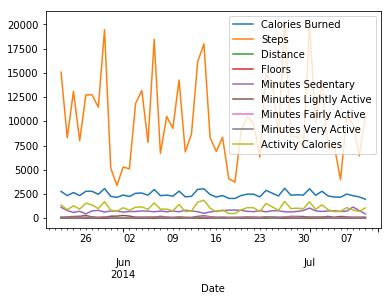

In [46]:
%matplotlib inline
df.plot()

[Text(0,0,'2014-05-22 00:00:00'),
 Text(0,0,'2014-05-27 00:00:00'),
 Text(0,0,'2014-06-01 00:00:00'),
 Text(0,0,'2014-06-06 00:00:00'),
 Text(0,0,'2014-06-11 00:00:00'),
 Text(0,0,'2014-06-16 00:00:00'),
 Text(0,0,'2014-06-21 00:00:00'),
 Text(0,0,'2014-06-26 00:00:00'),
 Text(0,0,'2014-07-01 00:00:00'),
 Text(0,0,'2014-07-06 00:00:00')]

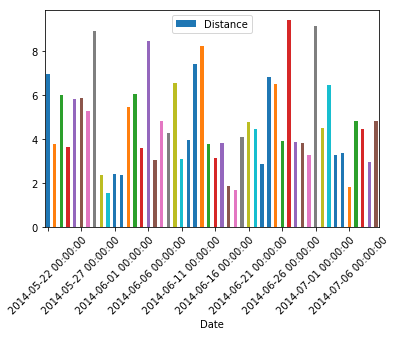

In [47]:
ax = df.plot(y="Distance",kind="bar",stacked="stacked",rot=45)
n = 5
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])

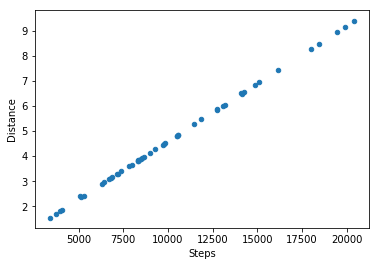

In [48]:
ax = df.plot(x="Steps",y="Distance",kind="scatter",style=['o','rx'])